In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

1. Find the number of Classes

In [35]:
len(np.unique(y_test))

10

2. Find the dimensions of each image

In [36]:
x_train.shape

(60000, 28, 28)

3.Display image from one class

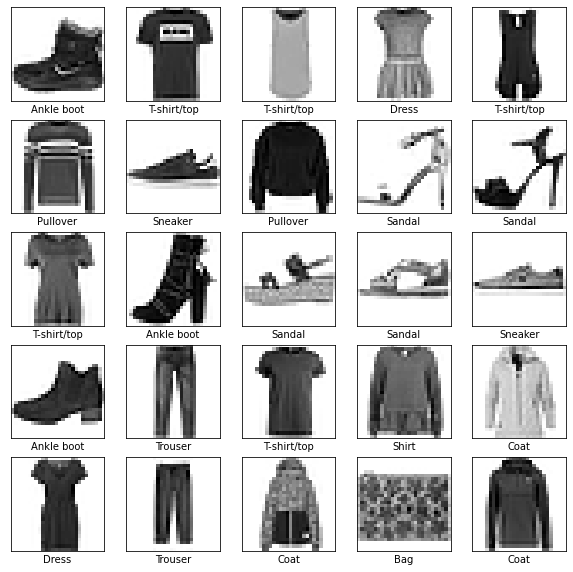

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

4.Perform Normalization

In [38]:
x_train=x_train/255.0
x_test=x_test/255.0 

5. Build two neural networks with 2 hidden layers and 5 hidden layers

In [39]:
#model 1
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"))
model1.add(tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"))
model1.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"))
model1.add(tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"))

In [40]:
#model 2
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"))
model2.add(tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer3"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer4"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer5"))
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"))

6.Train and test the above two networks

In [41]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4854 - accuracy: 0.8261 - val_loss: 0.3931 - val_accuracy: 0.8520
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3626 - accuracy: 0.8685 - val_loss: 0.3807 - val_accuracy: 0.8623
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3269 - accuracy: 0.8801 - val_loss: 0.3378 - val_accuracy: 0.8752
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3027 - accuracy: 0.8861 - val_loss: 0.3531 - val_accuracy: 0.8705
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2825 - accuracy: 0.8951 - val_loss: 0.3466 - val_accuracy: 0.8795
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.8991 - val_loss: 0.3229 - val_accuracy: 0.8830
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9029 - val_loss: 0.3295 - val_accuracy:

In [42]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=15,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5196 - accuracy: 0.8114 - val_loss: 0.3899 - val_accuracy: 0.8582
Epoch 2/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3836 - accuracy: 0.8610 - val_loss: 0.3797 - val_accuracy: 0.8625
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3459 - accuracy: 0.8738 - val_loss: 0.3441 - val_accuracy: 0.8765
Epoch 4/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3203 - accuracy: 0.8814 - val_loss: 0.3298 - val_accuracy: 0.8812
Epoch 5/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3027 - accuracy: 0.8889 - val_loss: 0.3504 - val_accuracy: 0.8747
Epoch 6/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2874 - accuracy: 0.8937 - val_loss: 0.3468 - val_accuracy: 0.8770
Epoch 7/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2766 - accuracy: 0.8972 - val_loss: 0.3421 - val_accuracy:

In [43]:
test_loss, test_acc = model1.evaluate(x_test, y_test)

print('Test accuracy of model 1:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8809
Test accuracy of model 1: 0.8809000253677368


In [44]:
test_loss, test_acc = model2.evaluate(x_test, y_test)

print('Test accuracy of model 2:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8820
Test accuracy of model 2: 0.8820000290870667


7.Compare their performance

Text(0.5, 1.0, 'Train - Accuracy Model 1')

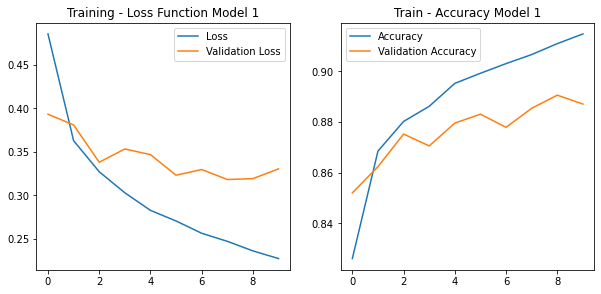

In [45]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'], label='Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function Model 1')

plt.subplot(2, 2, 2)
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy Model 1')

Text(0.5, 1.0, 'Train - Accuracy Model 2')

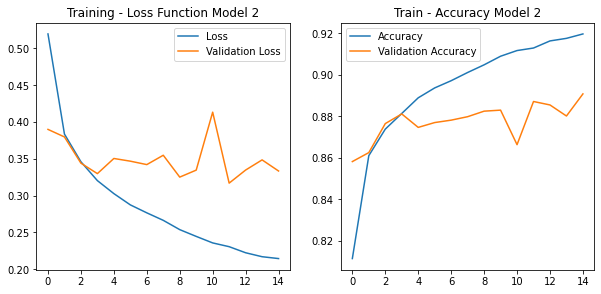

In [46]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function Model 2')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy Model 2')

We saw that the difference between accuracy of the 1st model when compared to that of the second model, is negligible. They are almost the same. This tells us that by adding alot of hidden layers wont affect the accuracy that much